In [30]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

## Import Data

In [2]:
Bank_data=pd.read_csv('bank-full.csv',sep=';')
Bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Data Understanding

In [3]:
Bank_data.shape

(45211, 17)

In [4]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
Bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
Bank_data.drop(["month","education","pdays","day","campaign","age","loan","housing","marital"],axis=1,inplace=True)

In [7]:
Bank_data.head()

,job,default,balance,contact,duration,previous,poutcome,y
0,management,no,2143,unknown,261,0,unknown,no
1,technician,no,29,unknown,151,0,unknown,no
2,entrepreneur,no,2,unknown,76,0,unknown,no
3,blue-collar,no,1506,unknown,92,0,unknown,no
4,unknown,no,1,unknown,198,0,unknown,no


## We will create dummy variable for categorical data

In [8]:
contact_d=pd.get_dummies(Bank_data['contact'],drop_first=True)
contact_d.columns


Index(['telephone', 'unknown'], dtype='object')

In [9]:
job_d=pd.get_dummies(Bank_data['job'],drop_first=True)
job_d.columns

Index(['blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown'],
      dtype='object')

In [10]:
poutcome_d=pd.get_dummies(Bank_data['poutcome'],drop_first=True)
poutcome_d.columns

Index(['other', 'success', 'unknown'], dtype='object')

In [11]:
default_d=pd.get_dummies(Bank_data['default'],drop_first=True)
default_d.columns

Index(['yes'], dtype='object')

In [13]:
Bank_data = pd.concat([Bank_data,default_d,poutcome_d,job_d,contact_d],axis=1)
Bank_data.head(3)

,job,default,balance,contact,duration,previous,poutcome,y,yes,other,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,management,no,2143,unknown,261,0,unknown,no,0,0,...,1,0,0,0,0,0,0,0,0,1
1,technician,no,29,unknown,151,0,unknown,no,0,0,...,0,0,0,0,0,1,0,0,0,1
2,entrepreneur,no,2,unknown,76,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,1


### We will drop the exist categorical columns for whome we have make dummy variable

In [14]:
Bank_data.drop(['default','poutcome','job','contact'],axis=1,inplace = True)
Bank_data.head()


,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,no,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,no,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,no,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,no,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,198,0,no,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [15]:
Bank_data.columns


Index(['balance', 'duration', 'previous', 'y', 'yes', 'other', 'success',
       'unknown', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown', 'telephone', 'unknown'],
      dtype='object')

In [16]:
bank_new = Bank_data.copy()
bank_new['y'] = bank_new['y'].map({'no':0,'yes':1})
bank_new.head(3)


,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


## Predicting for categorical variable we will create logistic regression model

In [17]:
X = Bank_data.drop("y",axis=1)
Y = Bank_data["y"]


In [19]:
classifier = LogisticRegression()
classifier.fit(X,Y)


LogisticRegression()

In [21]:
y_pred = classifier.predict(X)
y_pred_prob=classifier.predict_proba(X)
y_pred_prob


array([[0.97641583, 0.02358417],
       [0.98507644, 0.01492356],
       [0.99002662, 0.00997338],
       ...,
       [0.00853607, 0.99146393],
       [0.88227099, 0.11772901],
       [0.87909014, 0.12090986]])

In [23]:
cm=confusion_matrix = confusion_matrix(Y,y_pred)
accuracy=accuracy_score(Y,y_pred)
print(cm,accuracy)


[[39005   917]
 [ 3605  1684]] 0.8999800933401163


Accuray of model 0.8999 is  it is good model

In [26]:
print(classification_report(Y,y_pred))


              precision    recall  f1-score   support

          no       0.92      0.98      0.95     39922
         yes       0.65      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.88     45211



# ROC Curve


In [28]:
label_encoder = preprocessing.LabelEncoder()
y_predict = label_encoder.fit_transform(y_pred)
y_actual = label_encoder.fit_transform(bank_new['y'])

Text(0, 0.5, 'True Positive Rate')

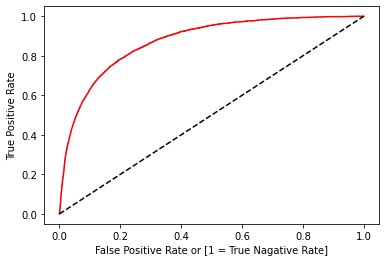

In [31]:
fpr, tpr, thresholds = roc_curve(y_actual, classifier.predict_proba (X)[:,1])
auc = roc_auc_score(y_actual, y_predict)
plt.plot(fpr,tpr,color='red', label='logit model(area = %0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate or [1 = True Nagative Rate]')
plt.ylabel('True Positive Rate')

### Area under the curve


In [32]:
auc

0.6477134406230929

## precision recall f1-score support
no 0.92 0.98 0.95 39922
yes 0.65 0.32 0.43 5289

So we can say this is avarage model prediction for
client will be subscibed or not